# Monte Carlo on CCS for AMBER (EPtot) energies

In [5]:
import numpy as np
import os
from os.path import *
import pandas as pd
from scipy.stats.stats import pearsonr

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from scipy.stats import gaussian_kde
from matplotlib.lines import Line2D

In [3]:
names = ['Harmine', '1-Methylguanosine', 'Sphingosine', 'riboflavin', 'Mandelonitrile', 'Creatinine', 'Methyleugenol',
        'N6-methyladenosine', 'Cholic Acid', 'Astilbin', 'SDGRG', 'Biliverdin', 'Anthranilic acid', 'Aminohippuric acid',
        '3\'-O-methylguanosine', 'Sucrose', 'Naringin', 'PE 16:1/16:1']
adducts = ['+H','+H','+H','+H','+H','+Na','+Na','+Na', '+Na','+Na','+Na','+Na', '-H', '-H', '-H', '-H', '-H', '-H']
molids = ['02', '03', '04', '05', '10', '11', '12', '14', '16', '17', '18', '19', '21', '22', '24', '25', '28', '29']
hexs = ['f90000', 'f95200', 'f98800', 'f9ae00', 'f9db00', 'ecf900', '9df900', '00f94a', '00f9c7', '00f4f9', '00b6f9',
        '007cf9', '0014f9', 'ae00f9', 'f900f9', 'f90091', 'a5a5a5', 'e3e3e3']

### Side by side boltzmann weighted and Lowest energy MC CCS results using AMBER (EPtot) energies

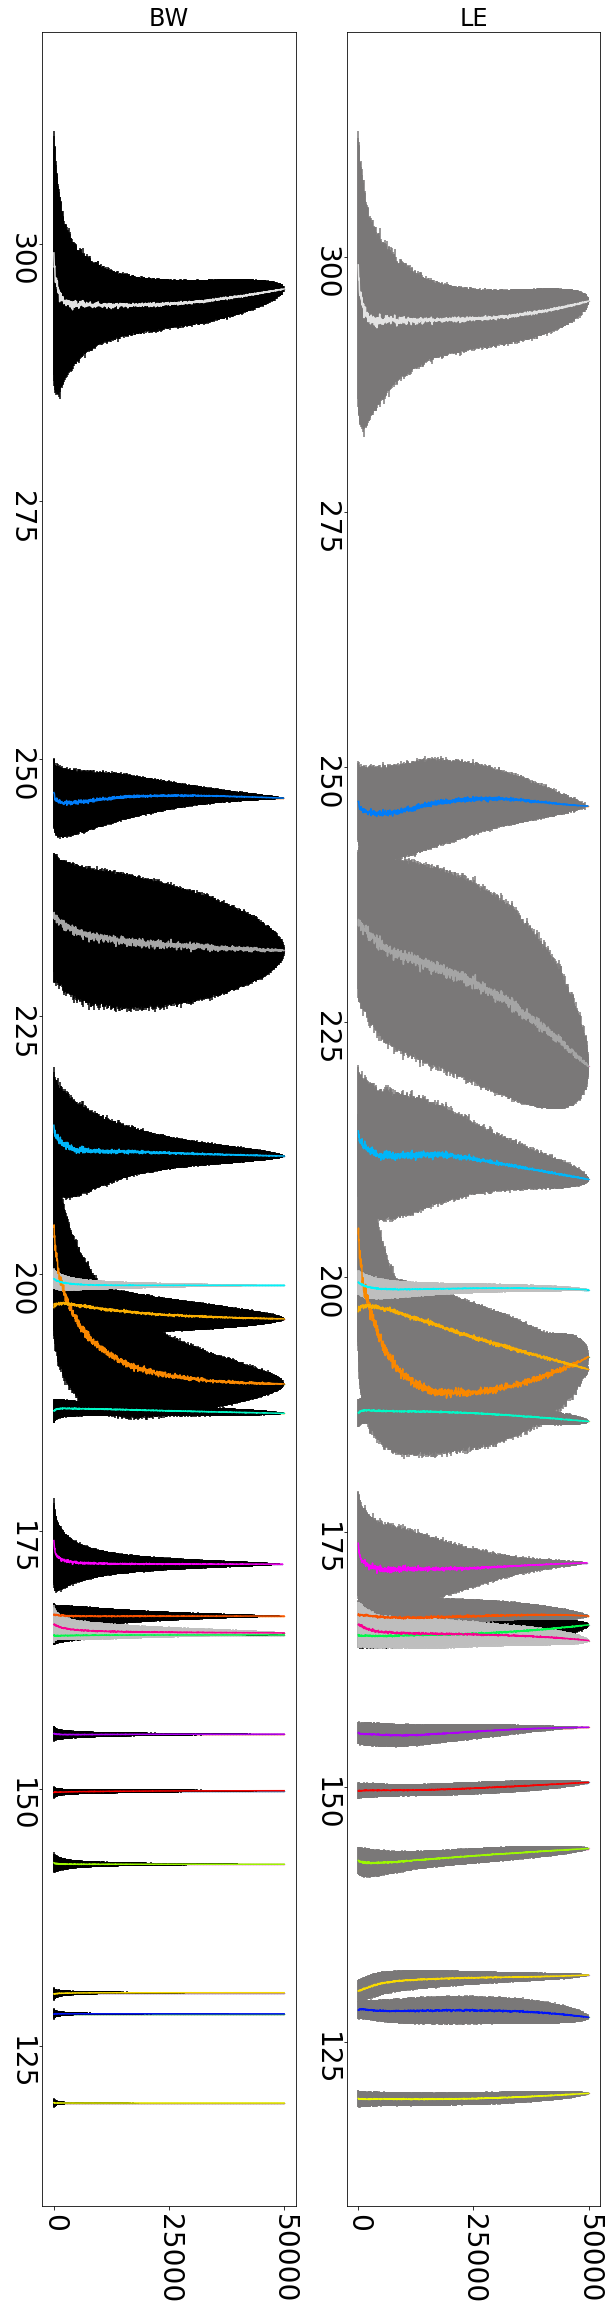

In [5]:
# Plot sideways for powerpoint presentation
plt.figure(figsize=(10,40))

ax1 = plt.subplot(1,2,1)
plt.title('BW', fontsize=24)
#plt.ylabel('CCS', fontsize=32)
#ax1.set_ylabel(rotation=180)
#plt.ylim(0,5)
plt.xticks([0, 25000, 50000])
plt.tick_params(axis='both', which='major', labelsize=28, labelrotation=270)

for j, ID in enumerate(molids):
    file = f'../data/MC-ccs-results/molid{ID}{adducts[j]}_MC_ccs_iter1000-md-EP.csv'
    if os.path.exists(file):
        pass
    else:
        print(f'not found for {ID}')
        continue
        
    df = pd.read_csv(file)

    if ID == '17' or ID == '25':
        cbw = '#bfbfbf'
    else:
        cbw = '#000000'
    color = [cbw, '#545454', '#7a7878', '#bfbfbf'] 
    color2 = [f'#{hexs[j]}', '#bf4e7f', f'#{hexs[j]}', '#542339']


    i = 0
    #for i in evens:
    plt.scatter(df['nlst'], df[df.columns[i]], s=.1)
    plt.errorbar(df['nlst'], df[df.columns[i]], yerr=df[df.columns[i+1]], fmt=color2[int(i/2)], ecolor=color[int(i/2)])

ax = plt.subplot(1,2,2)
plt.title('LE', fontsize=24)
#plt.ylim(0,5)
plt.xticks([0, 25000, 50000])

for j, ID in enumerate(molids):
    file = f'../data/MC-ccs-results/molid{ID}{adducts[j]}_MC_ccs_iter1000-md-EP.csv'
    if os.path.exists(file):
        pass
    else:
        print(f'not found for {ID}')
        continue
        
    df = pd.read_csv(file)

    if ID == '17' or ID == '25':
        cle = '#bfbfbf'
    elif ID == '14':
        cle = '#000000'
    else:
        cle = '#7a7878'
    color = ['#000000', '#545454', cle, '#bfbfbf'] 
    color2 = ['#ff66a8', '#bf4e7f', f'#{hexs[j]}', '#542339']


    i = 4
    #for i in evens:
    plt.scatter(df['nlst'], df[df.columns[i]], s=.1)
    plt.errorbar(df['nlst'], df[df.columns[i]], yerr=df[df.columns[i+1]], fmt=color2[int(i/2)], ecolor=color[int(i/2)])

plt.tick_params(axis='both', which='major', labelsize=28, labelrotation=270)
plt.show()

### Compares DFT Energy MC on CCS, DFT E cloud, AMBER (EPtot) Energy MC on CCS, AMBER (EPtot) E cloud

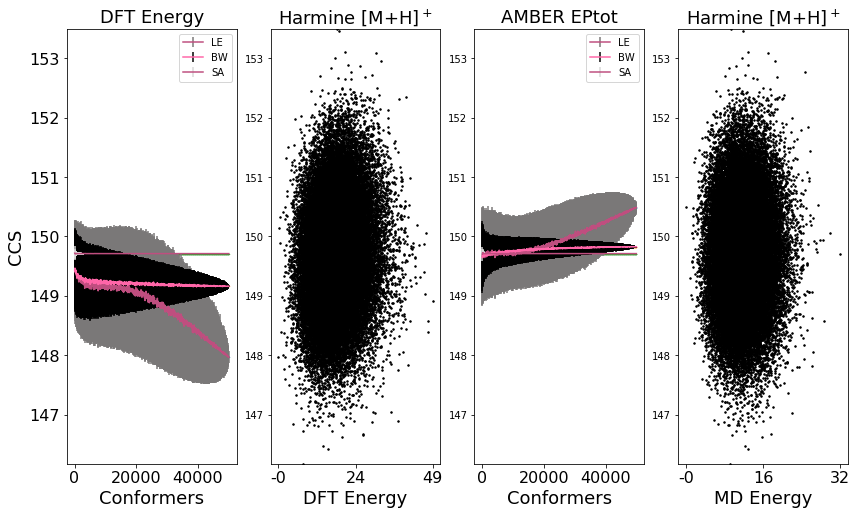

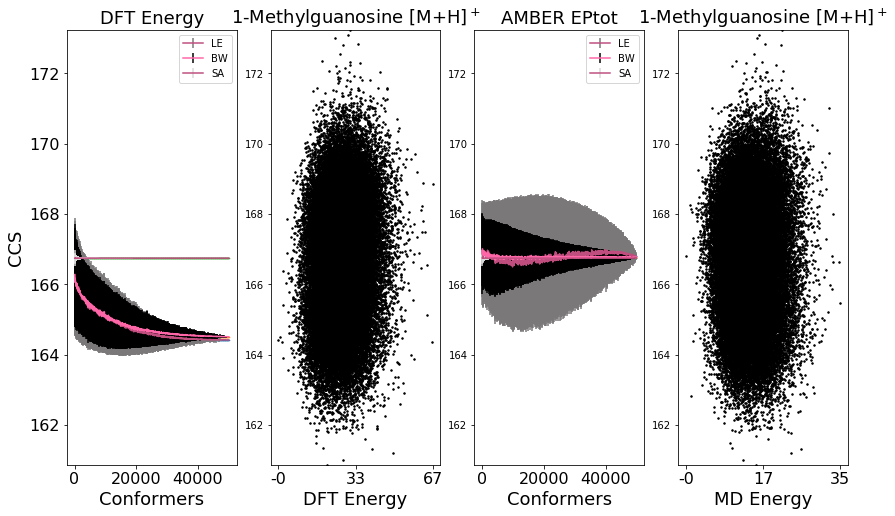

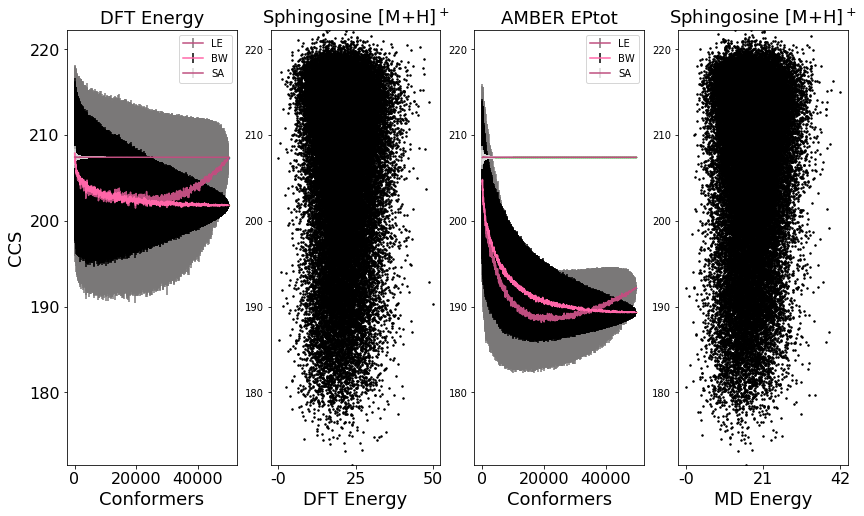

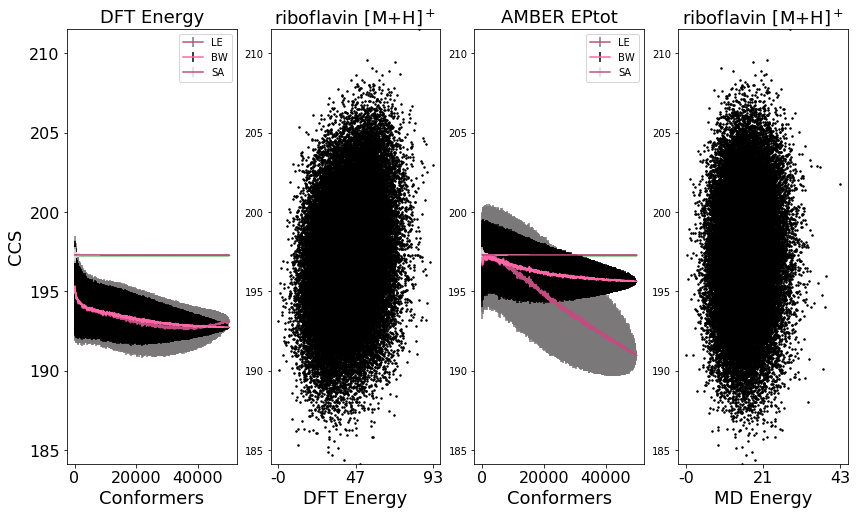

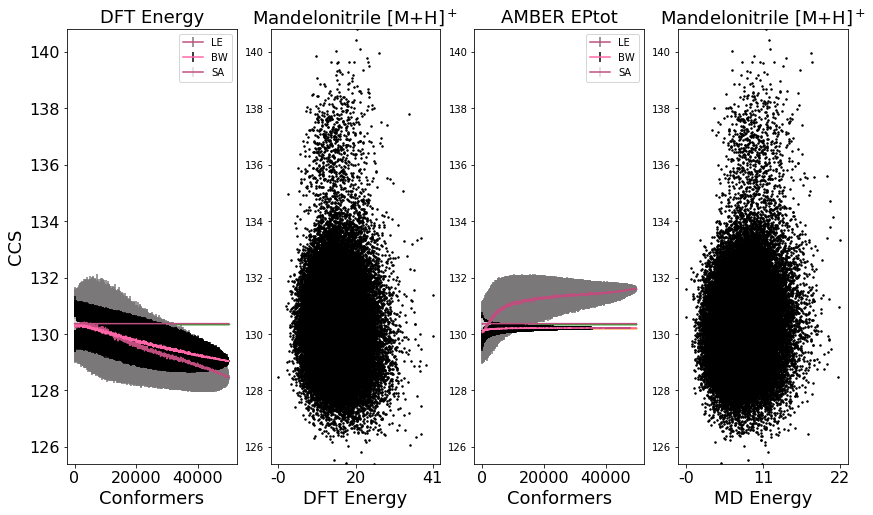

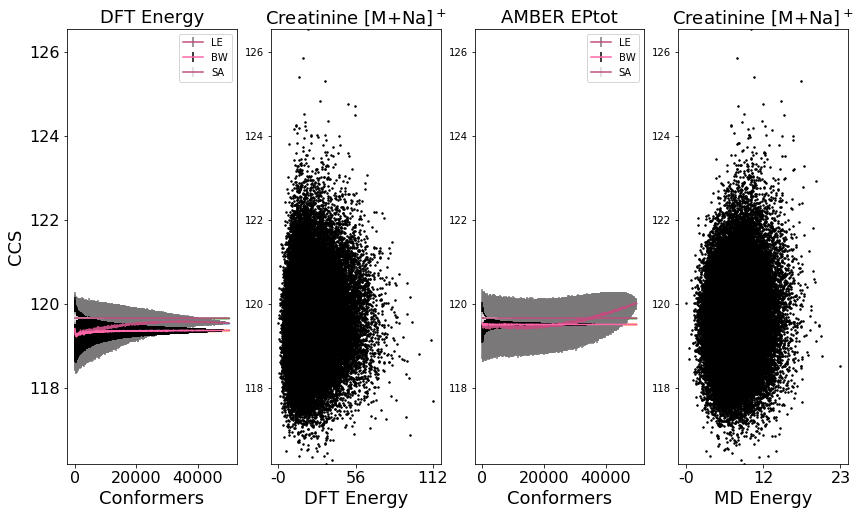

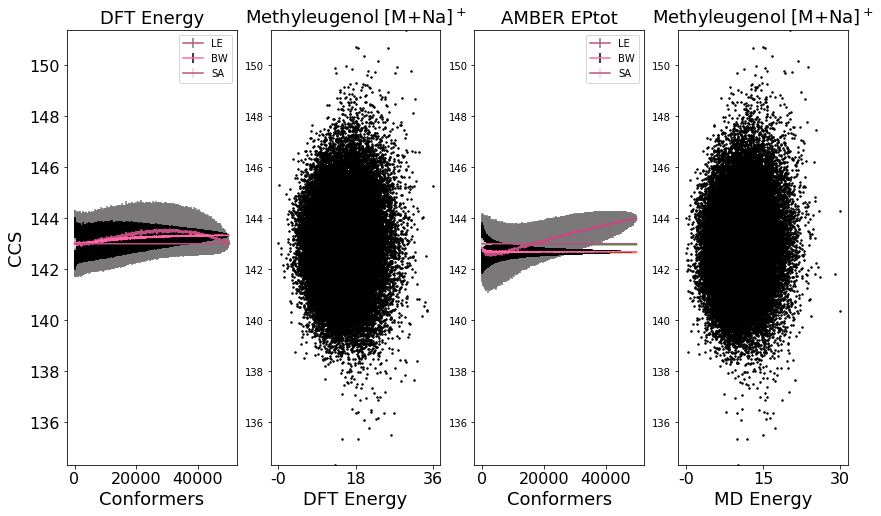

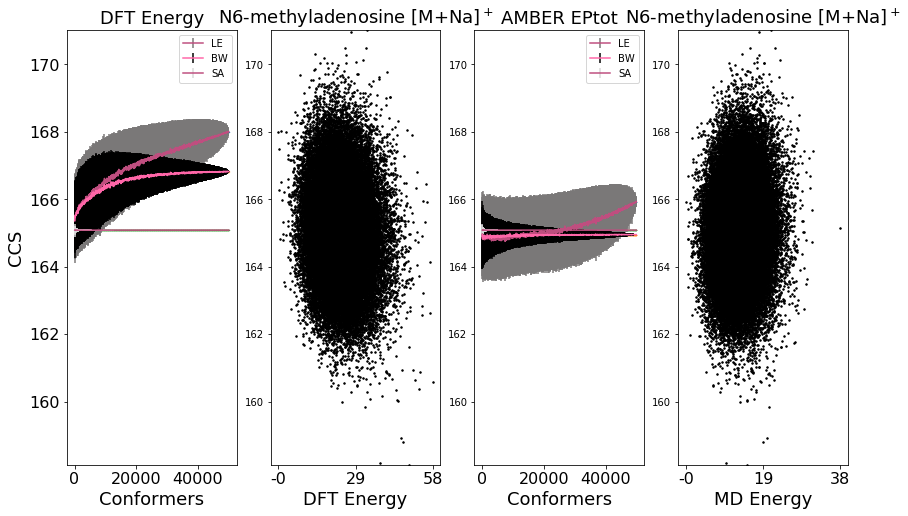

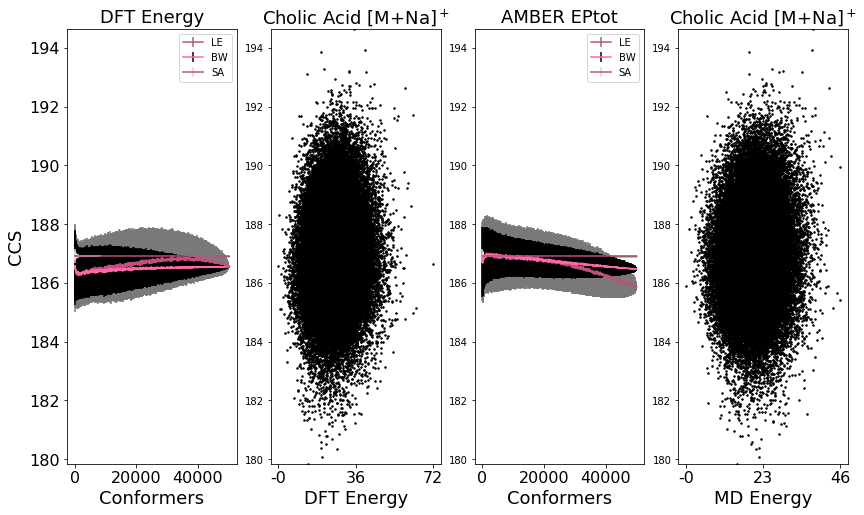

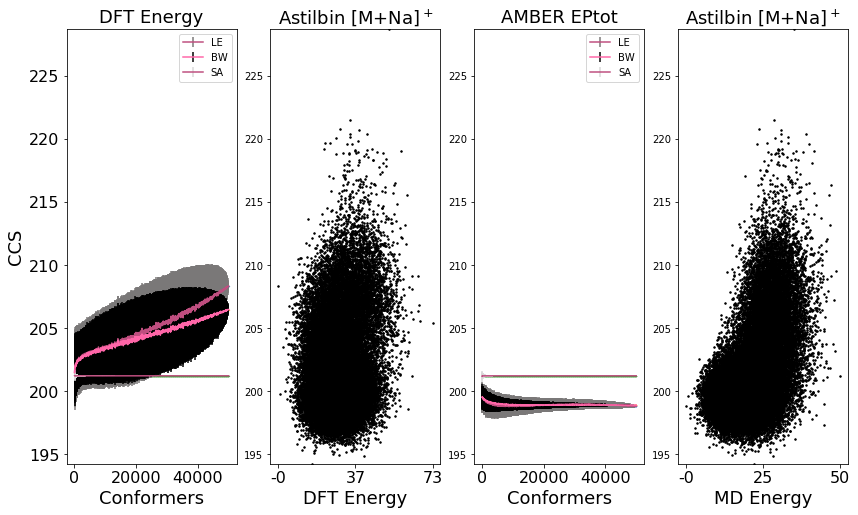

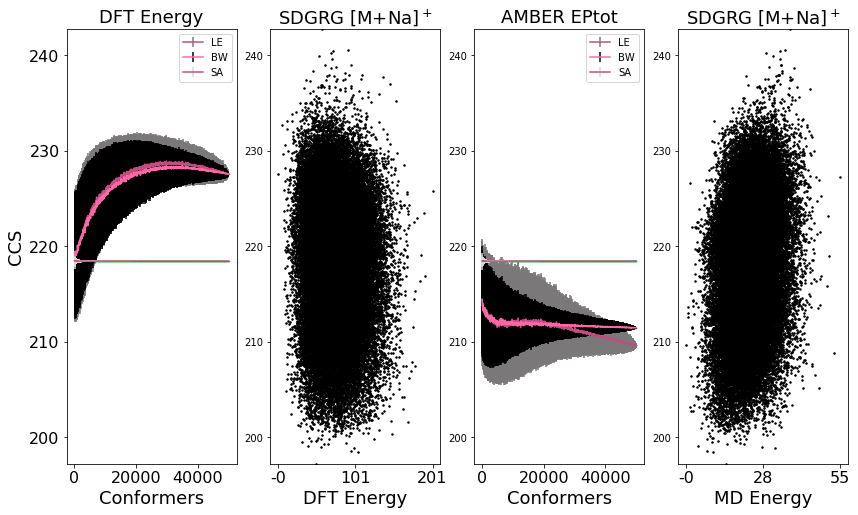

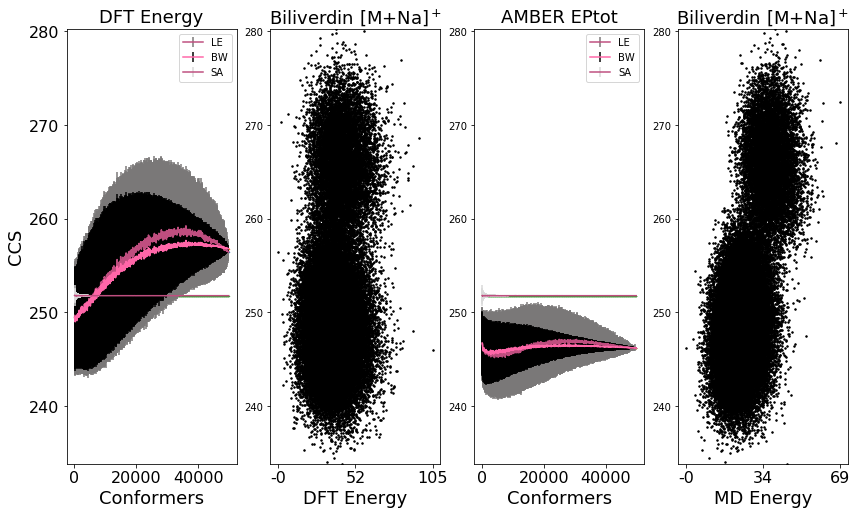

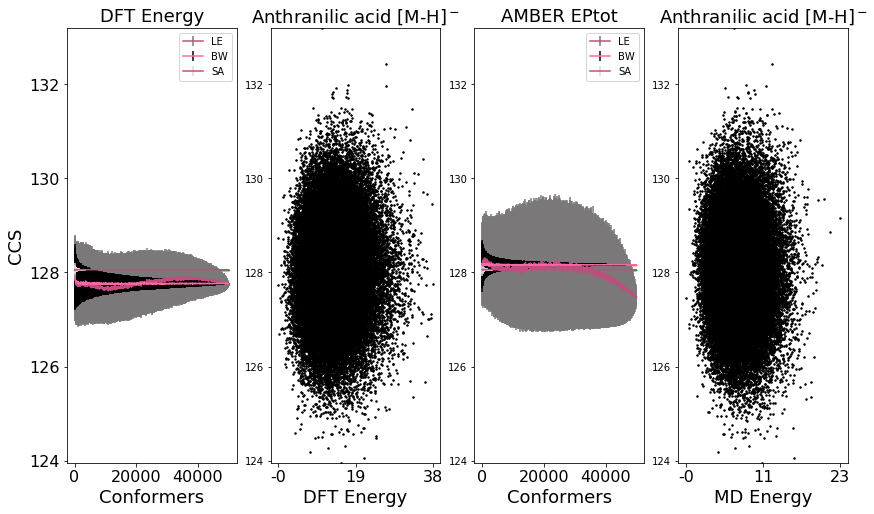

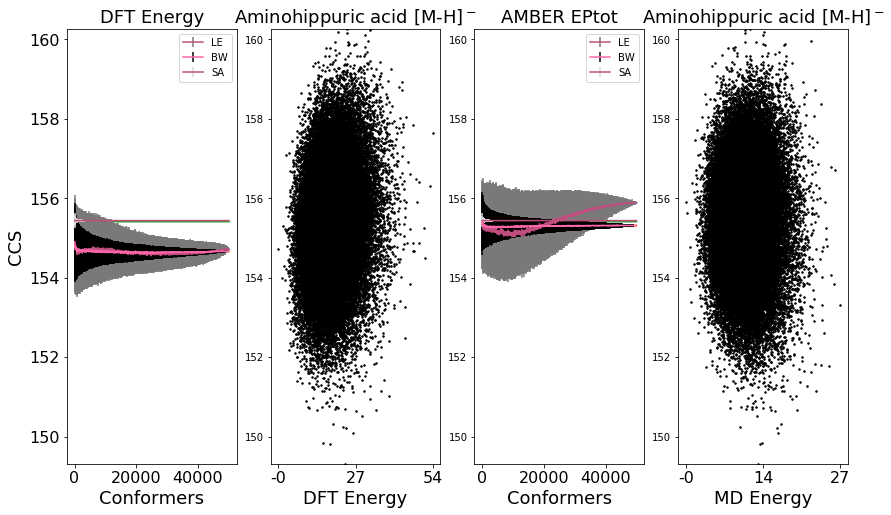

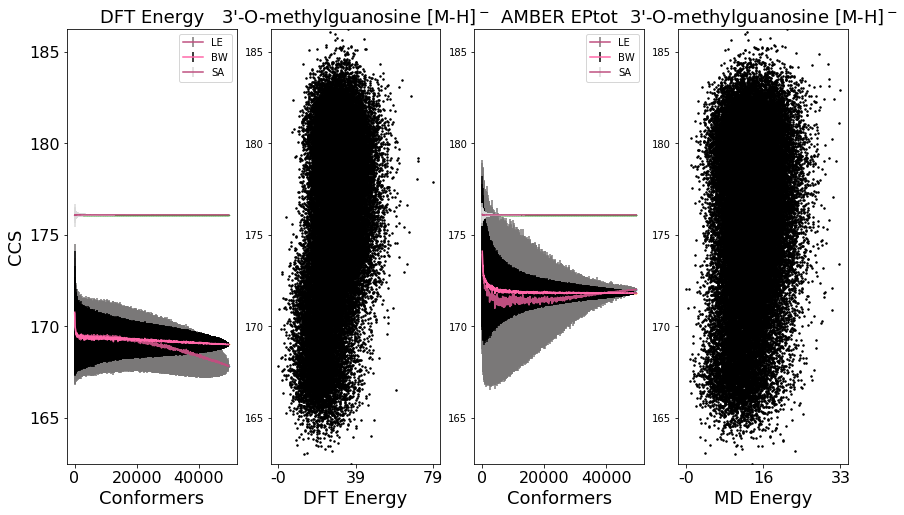

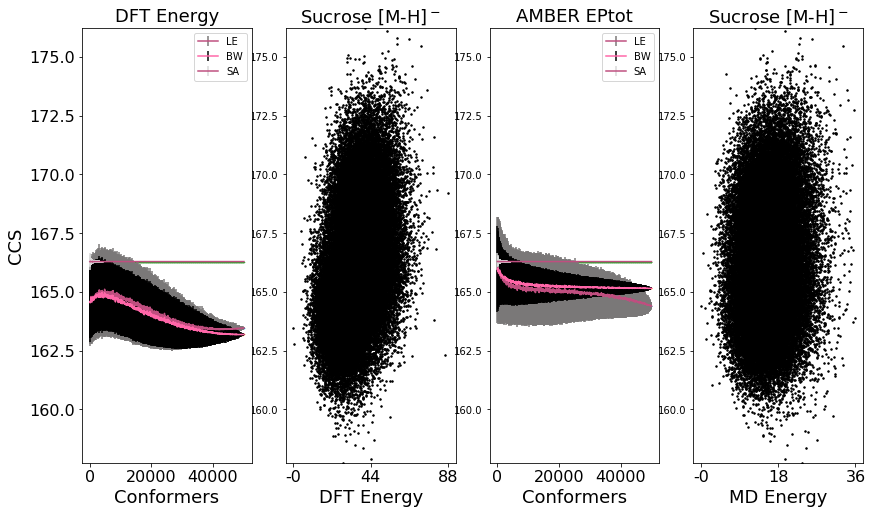

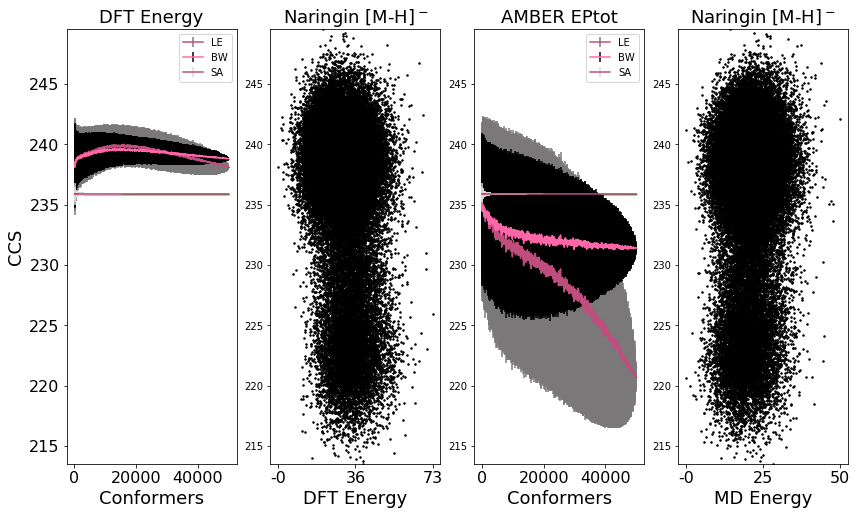

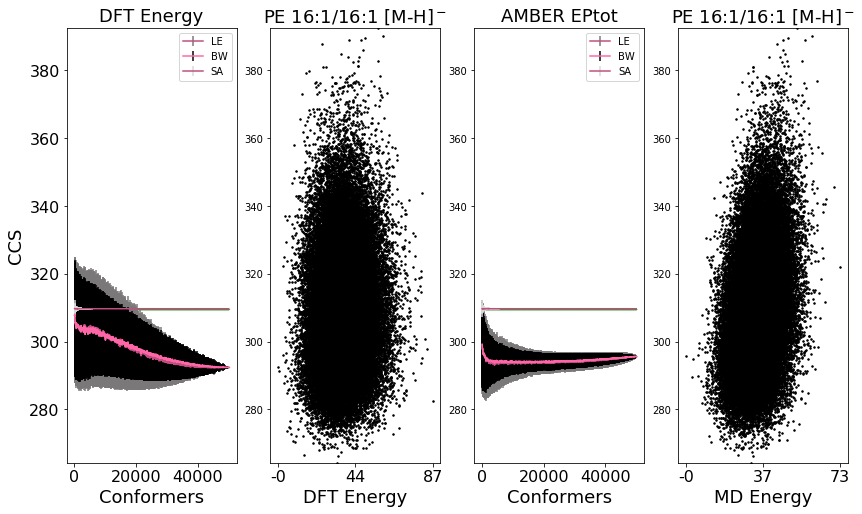

In [6]:
N = 50000

for i, ID in enumerate(molids):
    
    file = f'../data/MC-ccs-results/molid{ID}{adducts[i]}_MC_ccs_iter1000-md-EP.csv'
    if os.path.exists(file):
        pass
    else:
        print(f'not found for {ID}')
        continue
    
    # Pre-define x and y values for MD energy v ccs plot so we can use y for the y axis limits.
    e2df = pd.read_csv(f'../data/molid{ID}{adducts[i]}_amber_dft_ccs.csv') #molid{ID}_ccs_md.csv')   
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    mn = e2df['EPtot'].min()
    e2df['EPtot'] = e2df['EPtot'] - mn
    
    x2 = e2df['EPtot']
    y2 = e2df['ccs']

    
    
    # Set global figure
    plt.figure(figsize=(14,8))
    
    ####------------
    # Plot CCS vs DFT free energy. 
     # Plot this first to grab the y axis limits
    ax2 = plt.subplot(1,4,2)
    edf = pd.read_csv(f'../data/molid{ID}_ccs.csv')   
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    # Comment these out to restore specific DFT energy values
    # Which apparently is meaningless to compare to each other
    edf['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    mn = edf['dft_energy'].min()
    edf['dft_energy'] = edf['dft_energy'] - mn
    
    # Generate color by density
    x = edf['dft_energy']
    y = edf['ccs']
    #xy = np.vstack([x,y])
    #z = gaussian_kde(xy)(xy)
    z = 'black'

    plt.scatter(x, y, c=z, s=2.2)
    #plt.ylim(ymin, ymax)
    plt.xlabel('DFT Energy', fontsize=18)
    plt.title(f'{names[i]} [M{adducts[i]}]$^{adducts[i][0]}$', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    
    xtic = np.linspace(np.min(x)-0.01, np.max(x)+0.01, 3)
    ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    ax2.set_xticks(xtic)
    
    # Define the y limits, using y2 pre-defined earlier
    ymin = np.min([y.min(), y2.min()])
    ymax = np.max([y.max(), y2.max()])
    plt.ylim(ymin, ymax)    
    
    ####------------
    # Plot boltzmann weighted and lowest energy MC results
    plt.subplot(1,4,1)
    techdf = pd.read_csv(f'../data/MC-ccs-results/molid{ID}_MC_ccs_iter1000.csv')
    
    nlst = techdf['nlst']
    plt.scatter(nlst, techdf['Lowest Energy CCS'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Lowest Energy CCS'], yerr=techdf['lec std'],
                 fmt='#bf4e7f', ecolor='#7a7878', label='LE') #545454

    plt.scatter(nlst, techdf['Boltzmann Weighted'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Boltzmann Weighted'], yerr=techdf['bw std'],
                 fmt='#ff66a8', ecolor='#000000', label='BW')

    plt.scatter(nlst, techdf['Simple Ave'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Simple Ave'], yerr=techdf['sa std'], 
                 fmt='#bf4e7f', ecolor='#d9d9d9', label='SA') #7a7878
    
    # Set y axis again
    plt.ylim(ymin, ymax)
    plt.xlabel('Conformers', fontsize=18)
    plt.ylabel('CCS', fontsize=18)
    #plt.title(f'{names[i]}, molid{ID}')
    plt.title('DFT Energy', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.legend()
    
    
    ####------------
    # Plot boltzmann weighted and lowest energy MC results for AMBER MD
    plt.subplot(1,4,3)
    techdf = pd.read_csv(f'../data/MC-ccs-results/molid{ID}{adducts[i]}_MC_ccs_iter1000-md-EP.csv')
    
    nlst = techdf['nlst']
    plt.scatter(nlst, techdf['Lowest Energy CCS'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Lowest Energy CCS'], yerr=techdf['lec std'],
                 fmt='#bf4e7f', ecolor='#7a7878', label='LE') #545454

    plt.scatter(nlst, techdf['Boltzmann Weighted'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Boltzmann Weighted'], yerr=techdf['bw std'],
                 fmt='#ff66a8', ecolor='#000000', label='BW')

    plt.scatter(nlst, techdf['Simple Ave'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Simple Ave'], yerr=techdf['sa std'], 
                 fmt='#bf4e7f', ecolor='#d9d9d9', label='SA') #7a7878
    
    # Set y axis again
    plt.ylim(ymin, ymax)
    plt.xlabel('Conformers', fontsize=18)
    #plt.title(f'{names[i]}, molid{ID}')
    plt.title('AMBER EPtot', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    plt.legend()    
    
    
        
    ####------------
    # Plot CCS vs DFT free energy for DFT GO (geom opt)
    ax4 = plt.subplot(1,4,4)

    #xy2 = np.vstack([x2,y2])
    #z = gaussian_kde(xy2)(xy2)
    z = 'black'

    plt.scatter(x2, y2, c=z, s=2.2)
    plt.ylim(ymin, ymax)
    plt.xlabel('MD Energy', fontsize=18)
    plt.title(f'{names[i]} [M{adducts[i]}]$^{adducts[i][0]}$', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    
    xtic = np.linspace(np.min(x2)-0.01, np.max(x2)+0.01, 3)
    ax4.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    ax4.set_xticks(xtic)     
    #plt.savefig('testresolution_200.png', dpi=200)



02


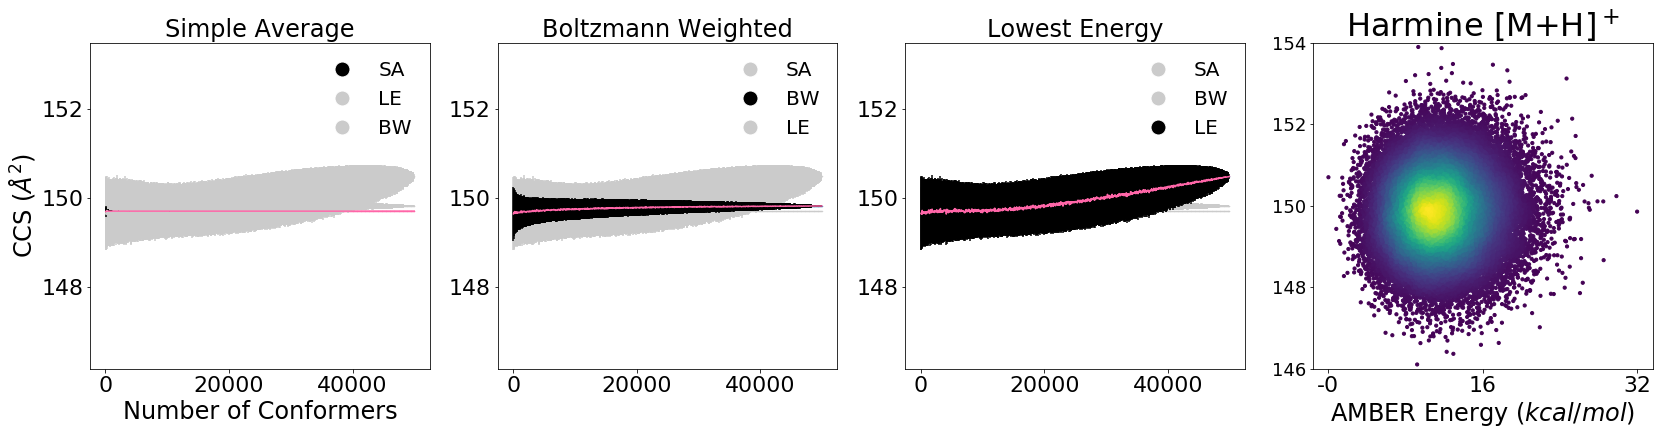

In [7]:
def cve(edf, ax, x, y, z):  

    # Find y axis min and max, used for all subplots
    ymin = y.min()
    ymax = y.max()
    
    plt.scatter(x, y, c=z, s=10)
    plt.ylim(ymin, ymax)
               
    xtic = np.linspace(np.min(x)-0.01, np.max(x)+0.01, 3)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    ax.set_xticks(xtic)
    
    ytic = np.linspace(np.min(y)-0.1, np.max(y)+0.1, 5)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    ax.set_yticks(ytic)
    
    plt.tick_params(axis='x', which='major', labelsize=22)


start = 0
end = 1
for d, ID in enumerate(molids[start:end], start=start):
    print(ID)
    plt.figure(figsize=(28,6))
    
    ####------------
    # Plot CCS vs DFT energy
    
    
    # Generate color gradient only once
    edf = pd.read_csv(f'../data/molid{ID}{adducts[d]}_amber_dft_ccs.csv') 
    
    mn = edf['EPtot'].min()
    edf['EPtot'] = edf['EPtot'] - mn
    x = edf['EPtot']
    y = edf['ccs']  
    
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    #z = 'black'    
    
    
    ax0 = plt.subplot(1,4,4) # rows, columns, number
    cve(edf, ax0, x, y, z)
    plt.title(f'{names[d]} [M{adducts[d]}]$^{adducts[d][0]}$', fontsize=32)
    
    plt.xlabel('AMBER Energy $\it{(kcal/mol)}$', fontsize=24) 
    plt.tick_params(axis='y', which='major', labelsize=18)
    
    ymin = y.min()
    ymax = y.max()
    
    ####------------
    # Plot SA
    plt.subplot(1,4,1)
    techdf = pd.read_csv(f'../data/MC-ccs-results/molid{ID}{adducts[d]}_MC_ccs_iter1000-md-EP.csv')
                      
    nlst = techdf['nlst']
    plt.scatter(nlst, techdf['Lowest Energy CCS'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, techdf['Lowest Energy CCS'], yerr=techdf['lec std'], fmt='#cbcbcb', ecolor='#cbcbcb') #fmt='#bf4e7f', ecolor='#545454')

    plt.scatter(nlst, techdf['Boltzmann Weighted'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, techdf['Boltzmann Weighted'], yerr=techdf['bw std'], fmt='#cbcbcb', ecolor='#cbcbcb') #fmt='#ff66a8', ecolor='#000000')

    plt.scatter(nlst, techdf['Simple Ave'], s=.1, c='#ff66a8')
    plt.errorbar(nlst, techdf['Simple Ave'], yerr=techdf['sa std'], fmt='#ff66a8', ecolor='#000000') #fmt='#bf4e7f', ecolor='#a8a8a8')
    
    plt.ylim(ymin, ymax)
    plt.ylabel('CCS ($\AA^2$)', fontsize=24)
    plt.xlabel('Number of Conformers', fontsize=24)    
    plt.title('Simple Average', fontsize=24)
    plt.tick_params(axis='both', which='major', labelsize=22)
    
    # LEGEND
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='SA',
                              markerfacecolor='#000000', markersize=15),
                       Line2D([0], [0], marker='o', color='w', label='LE',
                              markerfacecolor='#cbcbcb', markersize=15),
                       Line2D([0], [0], marker='o', color='w', label='BW',
                              markerfacecolor='#cbcbcb', markersize=15)]
    if ID == '14' or ID == '18':
        location = 'lower right'
    else:
        location = 'best'
    plt.legend(handles=legend_elements, frameon=False, prop={'size': 20} , loc=location)
    
    
    ####------------
    # Plot BW
    plt.subplot(1,4,2)
    
    nlst = techdf['nlst']
    plt.scatter(nlst, techdf['Lowest Energy CCS'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, techdf['Lowest Energy CCS'], yerr=techdf['lec std'], fmt='none', ecolor='#cbcbcb')

    plt.scatter(nlst, techdf['Simple Ave'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, techdf['Simple Ave'], yerr=techdf['sa std'], fmt='none', ecolor='#cbcbcb')

    plt.scatter(nlst, techdf['Boltzmann Weighted'], s=.1)
    plt.errorbar(nlst, techdf['Boltzmann Weighted'], yerr=techdf['bw std'], fmt='#ff66a8', ecolor='#000000')
    
    plt.ylim(ymin, ymax)
    plt.title('Boltzmann Weighted', fontsize=24)
    plt.tick_params(axis='both', which='major', labelsize=22)
    
    # LEGEND
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='SA',
                              markerfacecolor='#cbcbcb', markersize=15),
                       Line2D([0], [0], marker='o', color='w', label='BW',
                              markerfacecolor='#000000', markersize=15),
                       Line2D([0], [0], marker='o', color='w', label='LE',
                              markerfacecolor='#cbcbcb', markersize=15)]
    if ID == '14' or ID == '18':
        location = 'lower right'
    else:
        location = 'best'    
    plt.legend(handles=legend_elements, frameon=False, prop={'size': 20}, loc=location)
    

    ####------------
    # Plot LE
    plt.subplot(1,4,3)
    
    nlst = techdf['nlst']
    plt.scatter(nlst, techdf['Boltzmann Weighted'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, techdf['Boltzmann Weighted'], yerr=techdf['bw std'], fmt='none', ecolor='#cbcbcb')

    plt.scatter(nlst, techdf['Simple Ave'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, techdf['Simple Ave'], yerr=techdf['sa std'], fmt='none', ecolor='#cbcbcb')
    
    plt.scatter(nlst, techdf['Lowest Energy CCS'], s=.1, label='Simple Average')
    plt.errorbar(nlst, techdf['Lowest Energy CCS'], yerr=techdf['lec std'], fmt='#ff66a8', ecolor='#000000')    
    
    plt.ylim(ymin, ymax)  
    plt.title('Lowest Energy', fontsize=24)
    plt.tick_params(axis='both', which='major', labelsize=22)
    
    # LEGEND
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='SA',
                              markerfacecolor='#cbcbcb', markersize=15),
                       Line2D([0], [0], marker='o', color='w', label='BW',
                              markerfacecolor='#cbcbcb', markersize=15),
                       Line2D([0], [0], marker='o', color='w', label='LE',
                              markerfacecolor='#000000', markersize=15)]
    if ID == '14' or ID == '18':
        location = 'lower right'
    else:
        location = 'best'    
    plt.legend(handles=legend_elements, frameon=False, prop={'size': 20}, loc=location)

    if ID == '29':
        name = 'PE161161'
    else:
        name = names[d]
    #plt.savefig(f'BW-LE-SA-{name}-MD.png', dpi=600)
    plt.show()
